# Project: Sleep Quality Prediction Via Lifestyle Indicator Analysis

---
## 📌 Problem Statement
Many individuals suffer from poor sleep quality due to modern lifestyle habits like high screen time, caffeine consumption, and stress. This project aims to predict a person’s sleep quality based on their daily habits.

## 📊 Objective
To analyze primary data collected via Google Forms and build a Machine Learning model that identifies key factors contributing to sleep deprivation.

### 1. Data Loading and Cleaning
In this section, we load the dataset, remove unnecessary index columns, and rename the verbose survey questions into concise variable names for easier manipulation.

In [1]:
import pandas as pd

df = pd.read_csv("Sleep_Lifestyle_Patterns_Survey.csv")
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df.head()

,Gender:,Which age group do you belong to?,1. How many hours do you usually sleep per night?,2. How long does it typically take you to fall asleep?,3. How many hours before sleep do you usually eat dinner?,4. Do you often stay up late scrolling on your phone even when tired?,5. How many cups of tea/coffee do you drink per day?,"6. What is your average daily screen time of devices (mobile, laptop, etc.) of the week?",7. Do you struggle to sleep because of overthinking or racing thoughts?,8. How would you rate your daily stress level?,9. Do you exercise physically at least 3 times a week?,10. How satisfied are you with your sleep?
0,Female,26 - 45 years,7.0,15 - 30 mins,More than 2 hours,No,2 cups,0.5,Rarely/Never,6,No,7
1,Male,18 - 25 years,7.0,Less than 15 mins,More than 2 hours,Yes,1 cup,6.0,Rarely/Never,8,No,7
2,Female,18 - 25 years,7.0,15 - 30 mins,1 - 2 hours,No,2 cups,5.5,Often,4,Yes,8
3,Female,26 - 45 years,7.0,Less than 15 mins,1 - 2 hours,No,2 cups,3.0,Sometimes,5,No,7
4,Male,26 - 45 years,7.0,15 - 30 mins,1 - 2 hours,Yes,2 cups,12.0,Sometimes,7,Yes,6


In [2]:
print("No. of Rows and Columns in the dataset:",df.shape)

No. of Rows and Columns in the dataset: (107, 12)


In [3]:
df.rename(columns = {
    "Gender:": "Gender",
    "Which age group do you belong to?": "Age_Group",
    "1. How many hours do you usually sleep per night?": "Sleep_Duration",
    "2. How long does it typically take you to fall asleep?": "Sleep_Latency",
    "3. How many hours before sleep do you usually eat dinner?": "Dinner_Gap",
    "4. Do you often stay up late scrolling on your phone even when tired?": "Bedtime_Procrastination",
    "5. How many cups of tea/coffee do you drink per day?": "Caffeine_Cups",
    "6. What is your average daily screen time of devices (mobile, laptop, etc.) of the week?": "Screen_Time",
    "7. Do you struggle to sleep because of overthinking or racing thoughts?": "Mind_Thoughts",
    "8. How would you rate your daily stress level?": "Stress_Level",
    "9. Do you exercise physically at least 3 times a week?": "Exercise",
    "10. How satisfied are you with your sleep?": "Sleep_Quality"
}, inplace = True)

df.head()

,Gender,Age_Group,Sleep_Duration,Sleep_Latency,Dinner_Gap,Bedtime_Procrastination,Caffeine_Cups,Screen_Time,Mind_Thoughts,Stress_Level,Exercise,Sleep_Quality
0,Female,26 - 45 years,7.0,15 - 30 mins,More than 2 hours,No,2 cups,0.5,Rarely/Never,6,No,7
1,Male,18 - 25 years,7.0,Less than 15 mins,More than 2 hours,Yes,1 cup,6.0,Rarely/Never,8,No,7
2,Female,18 - 25 years,7.0,15 - 30 mins,1 - 2 hours,No,2 cups,5.5,Often,4,Yes,8
3,Female,26 - 45 years,7.0,Less than 15 mins,1 - 2 hours,No,2 cups,3.0,Sometimes,5,No,7
4,Male,26 - 45 years,7.0,15 - 30 mins,1 - 2 hours,Yes,2 cups,12.0,Sometimes,7,Yes,6


### 2. Feature Engineering: Binning
To simplify analysis, we categorize continuous or ordinal variables into discrete groups. 
* **Stress Level** ratings are categorized into 'Low', 'Moderate', and 'High'.
* **Sleep Quality** ratings are categorized into 'Poor' and 'Good'.

In [4]:
bins_stress = [0, 4, 7, 10]
labels_stress = ["Low", "Moderate", "High"]
cols1 = "Stress_Level"

bins_sleep = [0, 7, 10]
labels_sleep = ["Poor", "Good"]
cols2 = "Sleep_Quality"

df[cols1] = pd.cut(df[cols1], bins = bins_stress, labels = labels_stress, include_lowest = True)
df[cols2] = pd.cut(df[cols2], bins = bins_sleep, labels = labels_sleep, include_lowest = True)
df.head()

,Gender,Age_Group,Sleep_Duration,Sleep_Latency,Dinner_Gap,Bedtime_Procrastination,Caffeine_Cups,Screen_Time,Mind_Thoughts,Stress_Level,Exercise,Sleep_Quality
0,Female,26 - 45 years,7.0,15 - 30 mins,More than 2 hours,No,2 cups,0.5,Rarely/Never,Moderate,No,Poor
1,Male,18 - 25 years,7.0,Less than 15 mins,More than 2 hours,Yes,1 cup,6.0,Rarely/Never,High,No,Poor
2,Female,18 - 25 years,7.0,15 - 30 mins,1 - 2 hours,No,2 cups,5.5,Often,Low,Yes,Good
3,Female,26 - 45 years,7.0,Less than 15 mins,1 - 2 hours,No,2 cups,3.0,Sometimes,Moderate,No,Poor
4,Male,26 - 45 years,7.0,15 - 30 mins,1 - 2 hours,Yes,2 cups,12.0,Sometimes,Moderate,Yes,Poor


### 3. Exploratory Data Analysis (EDA)
#### 3.1 Demographic and Target Distribution
We visualize the distribution of Gender, Age Groups, and our target variable (Sleep Quality) to understand the composition of our dataset using pie charts.

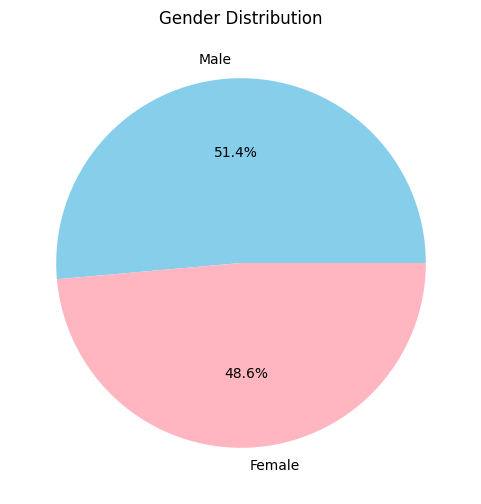

In [5]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.figure(figsize = (6, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', colors = ['skyblue', 'lightpink'])
plt.title("Gender Distribution")
plt.show()

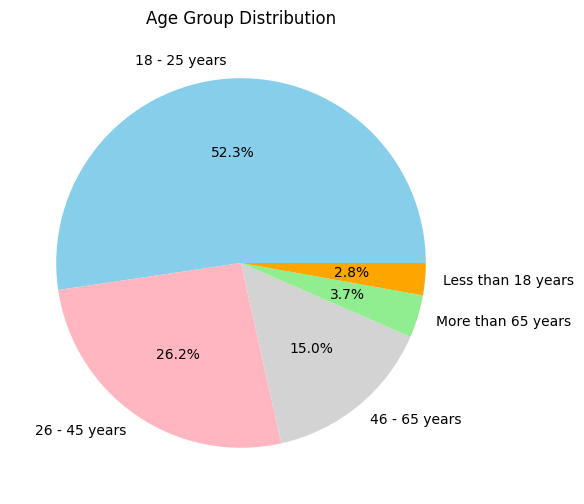

In [6]:
age_counts = df['Age_Group'].value_counts()

plt.figure(figsize = (6, 6))
plt.pie(age_counts, labels = age_counts.index, autopct = '%1.1f%%', colors = ['skyblue', 'lightpink', 'lightgrey', 'lightgreen', 'orange'])
plt.title("Age Group Distribution")
plt.show()

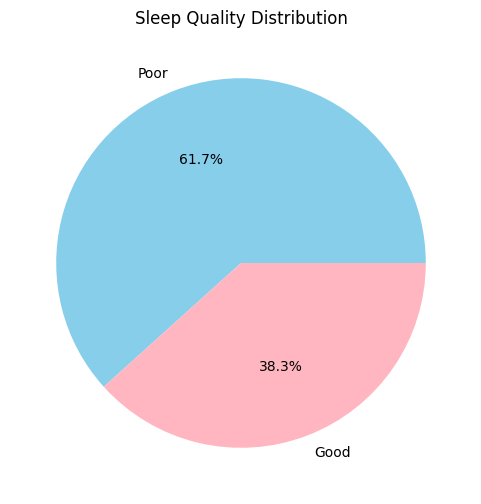

In [7]:
sleep_counts = df['Sleep_Quality'].value_counts()

plt.figure(figsize = (6, 6))
plt.pie(sleep_counts, labels = sleep_counts.index, autopct = '%1.1f%%', colors = ['skyblue', 'lightpink'])
plt.title("Sleep Quality Distribution")
plt.show()

#### 3.2 Lifestyle Habits vs. Sleep Quality
Here we examine how different lifestyle factors correlate with sleep quality. We use bar plots to compare:
* **Sleep Duration:** Compares average daily sleep duration against sleep quality ratings.
* **Screen Time:** Compares average daily screen time against sleep quality ratings.

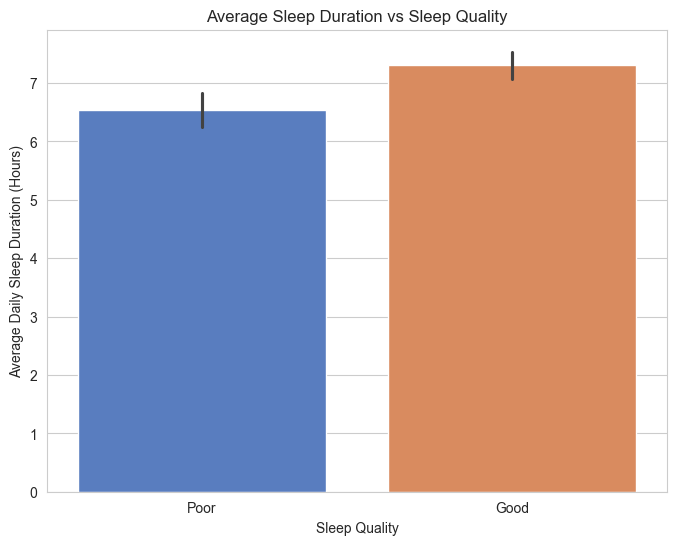

In [8]:
import seaborn as sns
sns.set_style("whitegrid")

quality_order = ["Poor", "Good"]

plt.figure(figsize = (8, 6))
sns.barplot(x = 'Sleep_Quality', y = 'Sleep_Duration', data = df, order = quality_order,
            palette = 'muted', hue = 'Sleep_Quality', legend = False, dodge = False)
plt.title("Average Sleep Duration vs Sleep Quality")
plt.ylabel("Average Daily Sleep Duration (Hours)")
plt.xlabel("Sleep Quality")
plt.show()

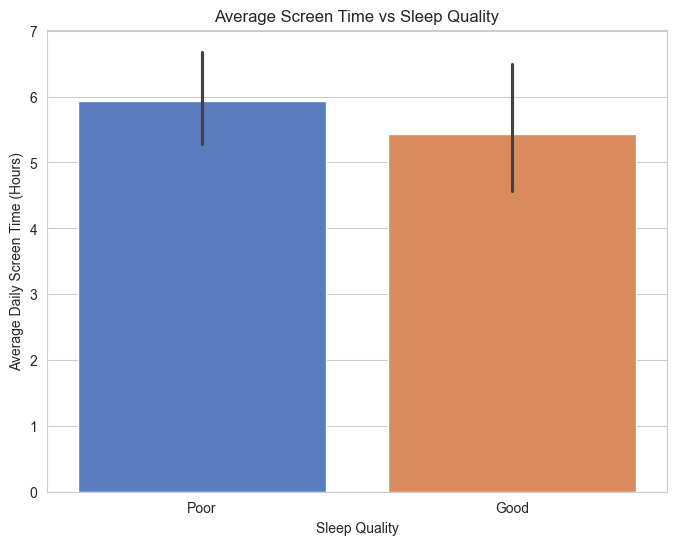

In [9]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Sleep_Quality', y = 'Screen_Time', data = df, order = quality_order,
            palette = 'muted', hue = 'Sleep_Quality', legend = False, dodge = False)
plt.title("Average Screen Time vs Sleep Quality")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.xlabel("Sleep Quality")
plt.show()

In [10]:
df.isnull().sum()

Gender                     0
Age_Group                  0
Sleep_Duration             0
Sleep_Latency              0
Dinner_Gap                 0
Bedtime_Procrastination    0
Caffeine_Cups              0
Screen_Time                0
Mind_Thoughts              0
Stress_Level               0
Exercise                   0
Sleep_Quality              0
dtype: int64

### 4. Data Preprocessing
#### 4.1 Label Encoding
Machine learning algorithms require numerical input. We use `LabelEncoder` to convert categorical variables (like Gender, Age Group, and Stress Level) into numeric format. We also explicitly map the target variable `Sleep_Quality` so that "Poor" becomes 0 and "Good" becomes 1.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = [
    "Gender", "Age_Group", "Sleep_Latency",
    "Dinner_Gap", "Bedtime_Procrastination", "Caffeine_Cups",
    "Mind_Thoughts", "Exercise", "Stress_Level"
]

for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age_Group,Sleep_Duration,Sleep_Latency,Dinner_Gap,Bedtime_Procrastination,Caffeine_Cups,Screen_Time,Mind_Thoughts,Stress_Level,Exercise,Sleep_Quality
0,0,1,7.0,0,2,0,2,0.5,1,2,0,Poor
1,1,0,7.0,2,2,1,1,6.0,1,0,0,Poor
2,0,0,7.0,0,0,0,2,5.5,0,1,1,Good
3,0,1,7.0,2,0,0,2,3.0,2,2,0,Poor
4,1,1,7.0,0,0,1,2,12.0,2,2,1,Poor


In [12]:
category_map = {
    "Poor": 0, "Good": 1,    
}

col = "Sleep_Quality"
df[col] = df[col].map(category_map)
df[col] = df[col].astype(int)
df.head()

,Gender,Age_Group,Sleep_Duration,Sleep_Latency,Dinner_Gap,Bedtime_Procrastination,Caffeine_Cups,Screen_Time,Mind_Thoughts,Stress_Level,Exercise,Sleep_Quality
0,0,1,7.0,0,2,0,2,0.5,1,2,0,0
1,1,0,7.0,2,2,1,1,6.0,1,0,0,0
2,0,0,7.0,0,0,0,2,5.5,0,1,1,1
3,0,1,7.0,2,0,0,2,3.0,2,2,0,0
4,1,1,7.0,0,0,1,2,12.0,2,2,1,0


In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   107 non-null    int64  
 1   Age_Group                107 non-null    int64  
 2   Sleep_Duration           107 non-null    float64
 3   Sleep_Latency            107 non-null    int64  
 4   Dinner_Gap               107 non-null    int64  
 5   Bedtime_Procrastination  107 non-null    int64  
 6   Caffeine_Cups            107 non-null    int64  
 7   Screen_Time              107 non-null    float64
 8   Mind_Thoughts            107 non-null    int64  
 9   Stress_Level             107 non-null    int64  
 10  Exercise                 107 non-null    int64  
 11  Sleep_Quality            107 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 10.2 KB


#### 4.2 Correlation Matrix
We generate a heatmap to visualize the correlation between different numerical features. This helps us identify which variables are most strongly positively or negatively associated with Sleep Quality.

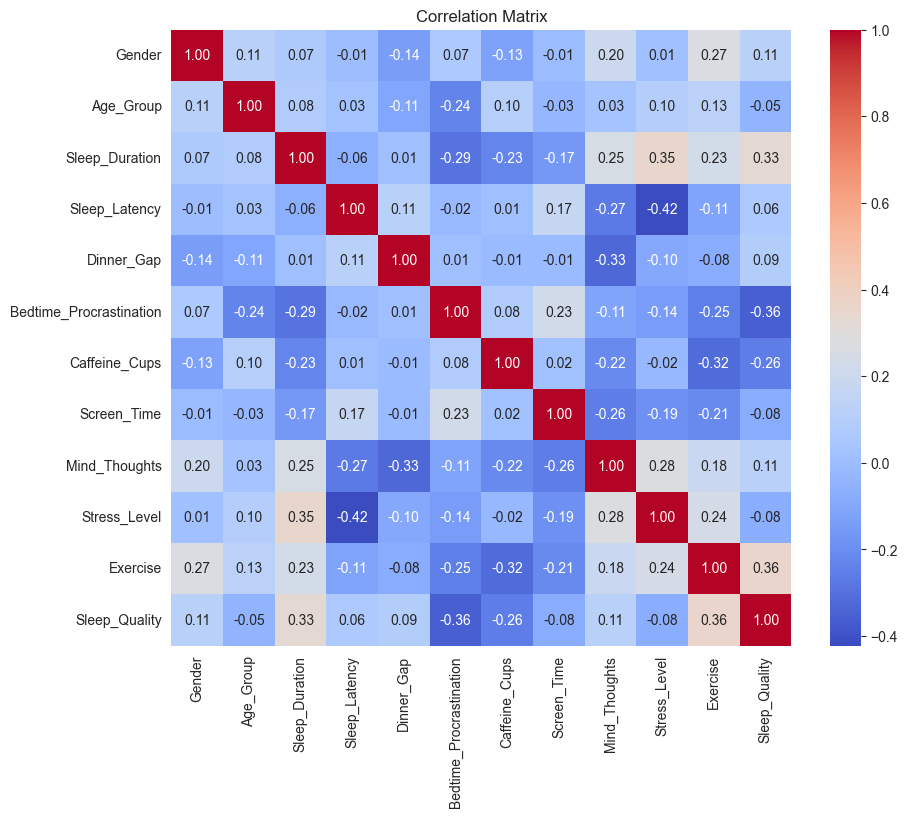

In [14]:
numerical_df = df.select_dtypes(include = ['number'])

plt.figure(figsize = (10, 8))
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### 5. Model Training and Evaluation Strategy
#### 5.1 Train-Test Split & Scaling
We split the data into training and testing sets with a 75-25 split. We also apply `StandardScaler` to normalize the feature values, ensuring that features with larger ranges don't dominate the models.

In [15]:
from sklearn.model_selection import train_test_split

x = df.drop('Sleep_Quality', axis = 1)
y = df['Sleep_Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (80, 11)
Testing Data Shape: (27, 11)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 5.2 Evaluation Framework
We define a custom function `evaluate_and_log` to consistently track model performance. This function:
* Calculates Accuracy, Precision, Recall, and F1 Score.
* Checks for **Overfitting** (if the gap between training and testing scores > 0.15).
* Checks for **Underfitting** (if Training Score < 0.5).

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
model_performance = []

def evaluate_and_log(model_name, model, x_train, y_train, x_test, y_test, best_params):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average = 'weighted', zero_division = 0)
    recall = recall_score(y_test, y_pred_test, average = 'weighted', zero_division = 0)
    f1 = f1_score(y_test, y_pred_test, average = 'weighted', zero_division = 0)

    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy
    gap = train_score - test_score
    
    print(f"--- {model_name} Results ---\n")
    print(f"Best Parameters:\n{best_params}\n")
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy:  {test_score:.4f}")
    print(f"Gap (Train - Test): {gap:.4f}")
    
    if gap > 0.15:
        print("⚠️ The Model may likely got overfitted!")
    elif train_score < 0.5:
        print("⚠️ The Model may likey got underfitted!")
    else:
        print("✅ The Model is fitted correctly!")
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test, zero_division=0))
    
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })

Gaussian Naive Bayes Model

In [18]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num = 20)
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_nb.fit(x_train_scaled, y_train)
evaluate_and_log("Gaussian Naive Bayes", grid_nb.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_nb.best_params_)

--- Gaussian Naive Bayes Results ---

Best Parameters:
{'var_smoothing': np.float64(0.11288378916846892)}

Training Accuracy: 0.7500
Testing Accuracy:  0.7037
Gap (Train - Test): 0.0463
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.83      0.42      0.56        12

    accuracy                           0.70        27
   macro avg       0.75      0.68      0.67        27
weighted avg       0.74      0.70      0.68        27



Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'solver': ['saga'],
    'C': [1.0, 5.0, 10.0, 20.0],
    'class_weight': ['balanced', None]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter = 5000, random_state = 42), param_grid_lr, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_lr.fit(x_train_scaled, y_train)
evaluate_and_log("Logistic Regression", grid_lr.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_lr.best_params_)

--- Logistic Regression Results ---

Best Parameters:
{'C': 5.0, 'class_weight': 'balanced', 'solver': 'saga'}

Training Accuracy: 0.7875
Testing Accuracy:  0.7778
Gap (Train - Test): 0.0097
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.88      0.58      0.70        12

    accuracy                           0.78        27
   macro avg       0.81      0.76      0.76        27
weighted avg       0.80      0.78      0.77        27



K-Nearest Neighbors Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_knn.fit(x_train_scaled, y_train)
evaluate_and_log("K-Nearest Neighbors", grid_knn.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_knn.best_params_)

--- K-Nearest Neighbors Results ---

Best Parameters:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Training Accuracy: 0.9125
Testing Accuracy:  0.7778
Gap (Train - Test): 0.1347
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.80      0.67      0.73        12

    accuracy                           0.78        27
   macro avg       0.78      0.77      0.77        27
weighted avg       0.78      0.78      0.77        27



Support Vector Machine Model

In [21]:
from sklearn.svm import SVC

param_grid_svm = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 0.5, 0.8, 1.0, 1.5, 2.0],
    'gamma': ['scale', 'auto', 0.1, 0.05, 0.01],
    'class_weight': [None, 'balanced'],
    'probability': [True, False]
}

grid_svm = GridSearchCV(SVC(random_state = 42), param_grid_svm, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_svm.fit(x_train_scaled, y_train)
evaluate_and_log("Support Vector Machine", grid_svm.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_svm.best_params_)

--- Support Vector Machine Results ---

Best Parameters:
{'C': 0.8, 'class_weight': 'balanced', 'gamma': 0.05, 'kernel': 'rbf', 'probability': True}

Training Accuracy: 0.8750
Testing Accuracy:  0.8148
Gap (Train - Test): 0.0602
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.89      0.67      0.76        12

    accuracy                           0.81        27
   macro avg       0.83      0.80      0.81        27
weighted avg       0.83      0.81      0.81        27



Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'ccp_alpha': [0.01, 0.015, 0.02, 0.025],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 4],
    'min_samples_leaf': [6, 7, 8, 9],
    'class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid_dt, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(x_train_scaled, y_train)
evaluate_and_log("Decision Tree", grid_dt.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_dt.best_params_)

--- Decision Tree Results ---

Best Parameters:
{'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 6}

Training Accuracy: 0.7750
Testing Accuracy:  0.7407
Gap (Train - Test): 0.0343
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        15
           1       1.00      0.42      0.59        12

    accuracy                           0.74        27
   macro avg       0.84      0.71      0.70        27
weighted avg       0.82      0.74      0.71        27



Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': [1, 2, 3],
    'max_samples': [0.6, 0.7, 0.8, None],
    'max_depth': [4, 5, 6, 8],
    'class_weight': ['balanced', 'balanced_subsample'],
    'n_estimators': [200, 300],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_rf, cv = cv_strategy, scoring = 'accuracy', n_jobs = -1)
grid_rf.fit(x_train_scaled, y_train)
evaluate_and_log("Random Forest", grid_rf.best_estimator_, x_train_scaled, y_train, x_test_scaled, y_test, grid_rf.best_params_)

--- Random Forest Results ---

Best Parameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 300}

Training Accuracy: 0.9500
Testing Accuracy:  0.8519
Gap (Train - Test): 0.0981
✅ The Model is fitted correctly!

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.67      0.80        12

    accuracy                           0.85        27
   macro avg       0.89      0.83      0.84        27
weighted avg       0.88      0.85      0.85        27



### 6. Model Performance Comparison
We compile the results into a dataframe and visualize the **Weighted F1 Score** of all models to determine the best performer, sorting by F1 Score and Accuracy.

In [24]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by = ['F1 Score', 'Accuracy'], ascending = False).reset_index(drop = True)

print("Model Performance Table:")
performance_df

Model Performance Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.851852,0.883041,0.851852,0.845752
1,Support Vector Machine,0.814815,0.827160,0.814815,0.810005
2,K-Nearest Neighbors,0.777778,0.780392,0.777778,0.774621
3,Logistic Regression,0.777778,0.798246,0.777778,0.768627
4,Decision Tree,0.740741,0.823232,0.740741,0.711888
5,Gaussian Naive Bayes,0.703704,0.740741,0.703704,0.679012


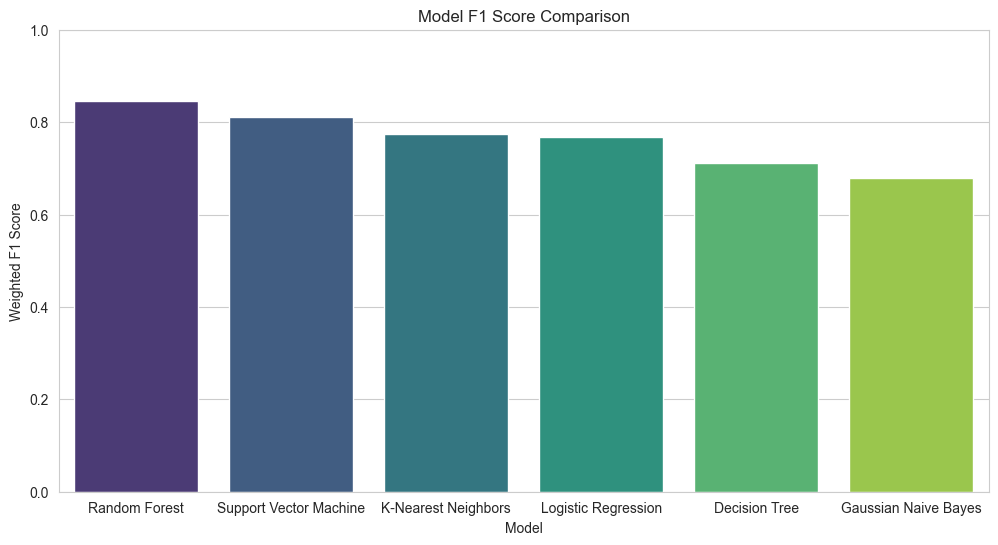

In [25]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Model', y = 'F1 Score', data = performance_df, hue = 'Model', palette = 'viridis', legend = False)
plt.title('Model F1 Score Comparison')
plt.ylim(0, 1.0)
plt.ylabel("Weighted F1 Score")
plt.show()

### 7. Feature Importance Analysis
To understand *why* the models make their predictions, we analyze feature importance.
* For tree-based models (Random Forest, Decision Tree), we use built-in feature importance.
* For Logistic Regression, we use coefficient magnitude.
* For other models, we use Permutation Importance.

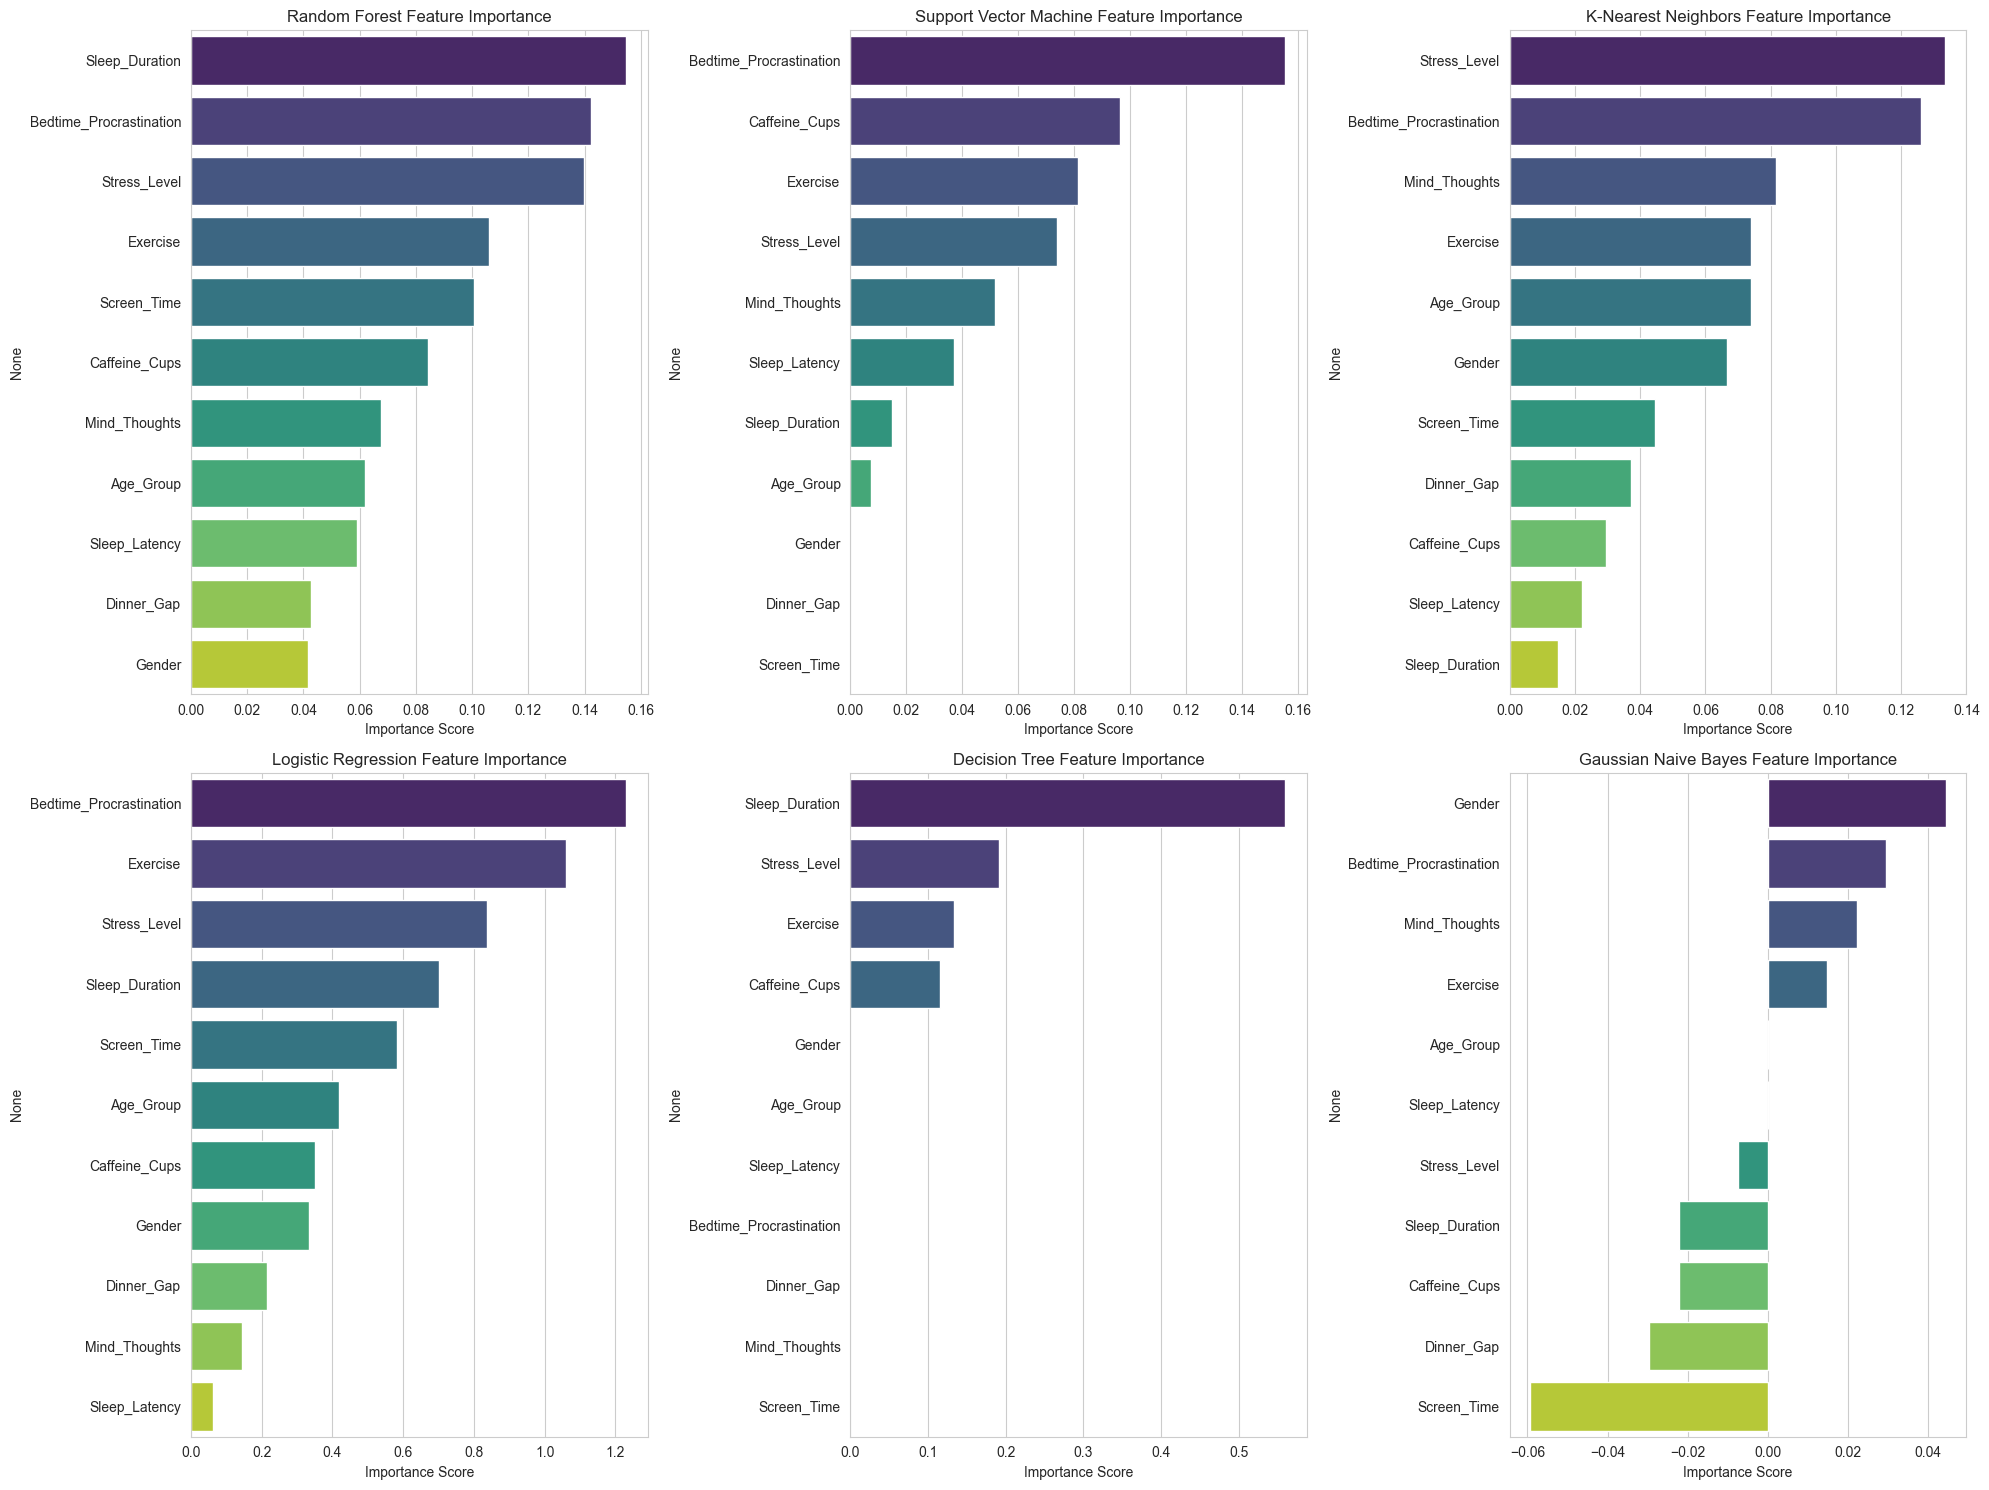

In [26]:
from sklearn.inspection import permutation_importance

rf_best = RandomForestClassifier(
    class_weight = 'balanced', criterion = 'gini', max_depth = 5,
    max_features = 'sqrt', max_samples = 0.8, min_samples_leaf = 2,
    n_estimators = 300, random_state = 42
)

svm_best = SVC(
    C = 0.8, class_weight = 'balanced', gamma = 0.05, kernel = 'rbf',
    probability = True, random_state = 42
)

knn_best = KNeighborsClassifier(
    metric = 'manhattan', n_neighbors = 3, weights = 'uniform'
)

lr_best = LogisticRegression(
    C = 5.0, class_weight = 'balanced', solver = 'saga', max_iter = 5000, random_state = 42
)

dt_best = DecisionTreeClassifier(
    ccp_alpha = 0.01, class_weight = None, criterion = 'entropy',
    max_depth = 3, max_features = 'sqrt', min_samples_leaf = 6, random_state = 42
)

nb_best = GaussianNB(var_smoothing = 0.11288378916846892)

models = {
    "Random Forest": rf_best,
    "Support Vector Machine": svm_best,
    "K-Nearest Neighbors": knn_best,
    "Logistic Regression": lr_best,
    "Decision Tree": dt_best,
    "Gaussian Naive Bayes": nb_best
}

feature_names = x.columns

plt.figure(figsize = (20, 15))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train_scaled, y_train)
    
    importance_values = []
    
    if hasattr(model, 'feature_importances_'):
        importance_values = model.feature_importances_
    elif hasattr(model, 'coef_') and name == "Logistic Regression":
        importance_values = np.abs(model.coef_[0])
    else:
        results = permutation_importance(model, x_test_scaled, y_test, scoring = 'accuracy', random_state = 42)
        importance_values = results.importances_mean

    feat_imp = pd.Series(importance_values, index = feature_names).sort_values(ascending = False)
    
    plt.subplot(2, 3, i)
    sns.barplot(x = feat_imp.values, y = feat_imp.index, hue = feat_imp.index, legend = False, palette = 'viridis')
    plt.title(f'{name} Feature Importance')
    plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

### 8. ROC Curve Analysis
We plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for all models. This graph illustrates the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate).

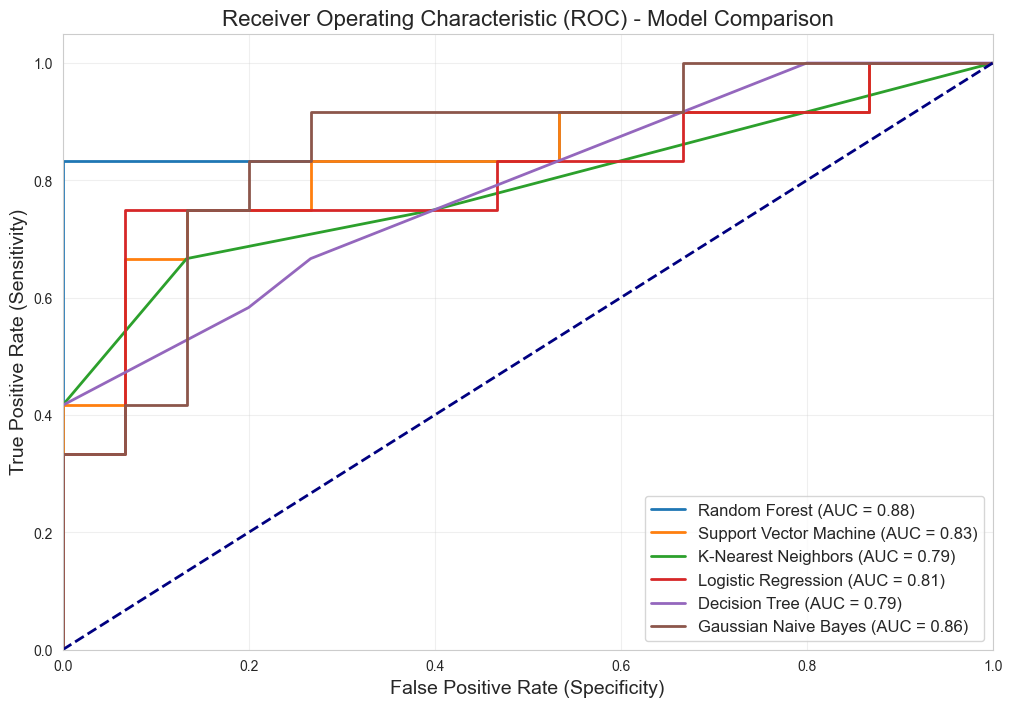

In [27]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (12, 8))

for name, model in models.items():
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw = 2, label = f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.title('Receiver Operating Characteristic (ROC) - Model Comparison', fontsize = 16)
plt.legend(loc = "lower right", fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()

### 9. Real-World Inference
Finally, we test our best-performing model (Random Forest) on synthetic "personas" to see if the predictions make logical sense:
1.  **The Healthy Person:** Low screen time, exercise, good sleep habits.
2.  **The Stressed Student:** High procrastination, high stress.
3.  **The Average Worker:** Moderate stats.
4.  **The Insomniac Gamer:** High screen time, racing thoughts.
5.  **The Retired Person:** Older, low stress.

In [28]:
new_data = [
    [1, 0, 8.0, 1, 2, 0, 0, 1.5, 0, 1, 1], 
    [0, 0, 5.0, 2, 0, 1, 4, 8.0, 1, 0, 0], 
    [1, 1, 6.5, 0, 1, 1, 2, 4.0, 0, 2, 0],
    [1, 0, 4.0, 2, 0, 1, 3, 12.0, 1, 0, 0],
    [0, 2, 7.0, 2, 2, 0, 1, 2.0, 0, 1, 1] 
]

columns = ['Gender', 'Age_Group', 'Sleep_Duration', 'Sleep_Latency', 'Dinner_Gap', 
           'Bedtime_Procrastination', 'Caffeine_Cups', 'Screen_Time', 'Mind_Thoughts', 
           'Stress_Level', 'Exercise']

new_df = pd.DataFrame(new_data, columns=columns)
new_df_scaled = scaler.transform(new_df)

predictions = rf_best.predict(new_df_scaled)
probabilities = rf_best.predict_proba(new_df_scaled)

print("--- Prediction Results for New Users ---")
for i, pred in enumerate(predictions):
    status = "Good" if pred == 1 else "Poor"
    confidence = probabilities[i][pred] * 100
    print(f"Person {i+1}: Predicted Sleep Quality = {status} (Confidence: {confidence:.2f}%)")

--- Prediction Results for New Users ---
Person 1: Predicted Sleep Quality = Good (Confidence: 76.52%)
Person 2: Predicted Sleep Quality = Poor (Confidence: 86.58%)
Person 3: Predicted Sleep Quality = Poor (Confidence: 88.55%)
Person 4: Predicted Sleep Quality = Poor (Confidence: 77.40%)
Person 5: Predicted Sleep Quality = Good (Confidence: 81.80%)
